## # Exercise on Convulotional Neural Networks 

In this exercise we will have a look at fully connected Convulotional Neural Networks (CNNs) for classification tasks such as computer vision.

## Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are a type of deep neural network that are commonly used for image recognition, image classification, and computer vision tasks. CNNs are designed to take advantage of the spatial structure of input data, which is particularly relevant for image data.

CNNs differ from other types of neural networks in that they treat their input data as a grid rather than a long vector of values. This grid-like structure is well-suited to image data, where the spatial relationships between pixels are important for understanding the visual content of the image.


**Figure 1. ANN & CNN  [([Stanford, CS231n])](https://cs231n.github.io/convolutional-networks/)** 

![ANN_CNN](https://github.com/GerasimosG/images/blob/main/ann_cnn.png?raw=truee)



A key component of CNNs are the convolutional layers. These layers are responsible for detecting features in the input data such as edges, lines, and color blobs. Each convolutional layer contains multiple filters, which are small squares of weights that slide over the input data and produce a feature map. The number of filters in a convolutional layer determines how many different features it can detect.

Filters are also referred to as kernels and they are responsible for learning patterns and detecting edges, shapes, textures, or other salient features in the input image. During the convolution operation, the filter slides over the input image one pixel at a time, and calculates the dot product between the filter values and the corresponding pixel values in the input image. The resulting values form the output feature map, which highlights the locations of the detected features in the input image.

The padding and stride are important hyperparameters in the convolutional layer. The padding size determines the number of zeros around the input image, and the stride specifies how many pixels the filter slides over the input image at a time.

Pooling layers are another important component of CNNs. These layers downsample the feature maps produced by the convolutional layers to reduce the size of the data while retaining the most important information. The most common type of pooling layer is the max-pooling layer, which selects the maximum value within a rectangular region of the feature map and discards the rest. This reduces the size of the feature map while retaining the most salient features.

The output of the last pooling layer is typically flattened into a vector and passed to a fully connected layer for classification. In this layer, each neuron is connected to every neuron in the previous layer, allowing for complex nonlinear relationships between the input data and the output classes.

In summary, CNNs are a powerful type of neural network that are designed to take advantage of the spatial structure of input data, particularly image data. The convolutional layers detect features in the input data, while the pooling layers downsample the feature maps to reduce their size. The output of the last pooling layer is typically flattened and passed through one or more fully connected layers for classification or other downstream tasks.


**Figure 2.LENET: A LeNET-5 Network [([LeCun, 1998])](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=726791&casa_token=3_NNxki4NZ4AAAAA:fww7n8pxscH835KHcECLMclXHlX7wdW7YqM4ARSPk6IVkB2-XLBv5Po-XXWQOFg_XK3JIqPo9TVY&tag=1)**


![LENET](https://github.com/GerasimosG/images/blob/main/yanlecun.png?raw=true) 


* Filters

Filters are square-shaped objects that slide over an image to extract specific features, and their size is determined by a hyperparameter. During convolution, the filter slides over each image row to generate a feature map that highlights the presence of certain features. Each pixel in a convolutional layer has a weight learned during training, and the number of weights is determined by the filter size and the number of channels in the input. Increasing the number of filters increases the number of weights in the network, making it more complex and potentially more accurate.


**Figure 3. Filters  [([Stanford, CS231n])](https://cs231n.github.io/convolutional-networks/)** 

![Filter](https://github.com/GerasimosG/images/blob/main/filters.png?raw=true)

* Max Pooling

Pooling layers are another important component of a convolutional neural network (CNN). Pooling layers are typically placed after convolutional layers and are used to reduce the spatial size (width and height) of the feature maps. The most common type of pooling is called max pooling, where the maximum value within a small rectangular window is selected and retained, while the other values are discarded. This process helps to reduce the number of parameters and computations required for subsequent layers, while also helping to prevent overfitting.


**Figure 4. Max Pooling  [([Stanford, CS231n])](https://cs231n.github.io/convolutional-networks/)** 

![MPOOL](https://github.com/GerasimosG/images/blob/main/max_pool.png?raw=true)


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. Each class contains 6,000 images. The training set contains 50,000 images, while the test sets provides 10,000 images. This image taken from the CIFAR repository ( https://www.cs.toronto.edu/~kriz/cifar.html ). This is a classification problem with 10 classes(muti-label classification). We can take a view on this image for more comprehension of the dataset.

In [2]:
# The classes are:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# You can access the CIFAR10 directly from TensorFlow
cifar10 = tf.keras.datasets.cifar10

# Load the data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(f'train_images shape:{train_images.shape}')
print(f'train_labels shape:{train_labels.shape}')
print(f'test_images shape:{test_images.shape}')
print(f'test_labels shape:{test_labels.shape}')

170498071/170498071 [==============================] - 3s 0us/step
train_images shape:(50000, 32, 32, 3)
train_labels shape:(50000, 1)
test_images shape:(10000, 32, 32, 3)
test_labels shape:(10000, 1)


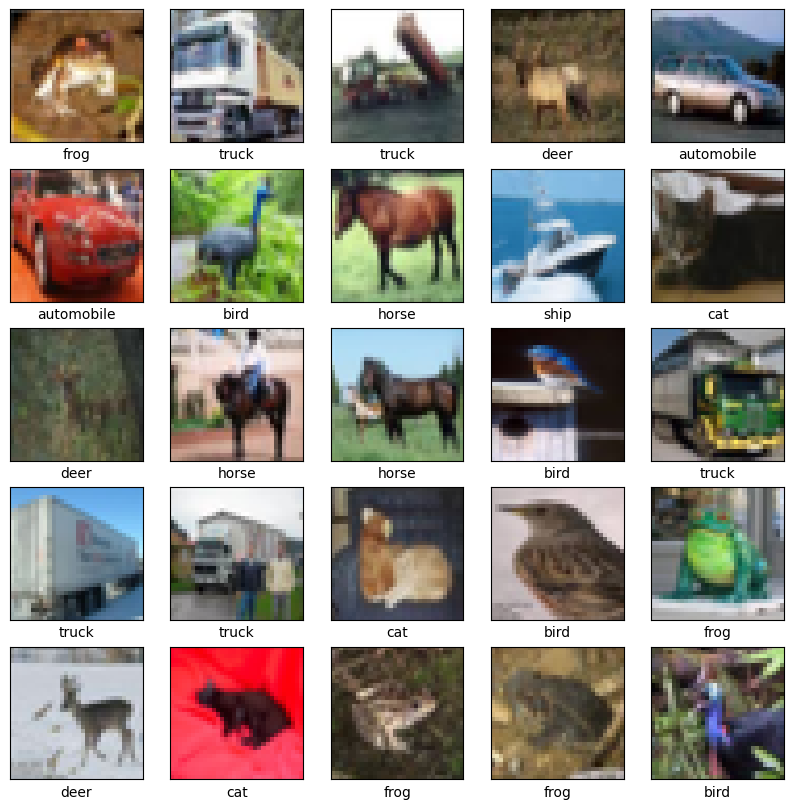

In [3]:
# First, we can visualize the CIFAR10 data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [4]:
# Now we create a cat_vs_dog dataset from Cifar10
class_names = ['cat', 'dog']

# Get from CIFAR10 the indexes for cats and dogs
idx_cats = np.argwhere(train_labels[:,0] == 3)
idx_dogs = np.argwhere(train_labels[:,0] == 5)

# Create the new dataset and change the labels: 1 for dogs and 0 for cats
# If you have kernel problems, reduce the training size
train_size = 5000

train_images_cats_dogs = np.zeros((train_size,32,32,3), dtype='uint8')
train_labels_cats_dogs = np.zeros((train_size,1),dtype='int')

train_images_cats_dogs[:train_size//2] = train_images[idx_cats[:train_size//2,0]]
train_images_cats_dogs[train_size//2:train_size] = train_images[idx_dogs[:train_size//2,0]]

train_labels_cats_dogs[:train_size//2] = tf.zeros_like(idx_cats[:train_size//2])
train_labels_cats_dogs[train_size//2:train_size] = tf.ones_like(idx_cats[:train_size//2])

train_images_cats_dogs = tf.convert_to_tensor(train_images_cats_dogs)

# Shuffle the train data before train
indices = tf.range(start=0, limit=tf.shape(train_images_cats_dogs)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

train_images_cats_dogs = tf.gather(train_images_cats_dogs, shuffled_indices)
train_labels_cats_dogs = tf.gather(train_labels_cats_dogs, shuffled_indices)

# We do the same for test dataset
idt_cats = np.argwhere(test_labels[:,0] == 3)
idt_dogs = np.argwhere(test_labels[:,0] == 5)

# If you have kernel problems, reduce the test size
test_size = 1000

test_images_cats_dogs = np.zeros((test_size,32,32,3), dtype='uint8')
test_labels_cats_dogs = np.zeros((test_size,1),dtype='int')

test_images_cats_dogs[:test_size//2] = test_images[idt_cats[:test_size//2,0]]
test_images_cats_dogs[test_size//2:test_size] = test_images[idt_dogs[:test_size//2,0]]

test_labels_cats_dogs[:test_size//2] = tf.zeros_like(idt_cats[:test_size//2])
test_labels_cats_dogs[test_size//2:test_size] = tf.ones_like(idt_cats[:test_size//2])

test_images_cats_dogs = tf.convert_to_tensor(test_images_cats_dogs)

# Shuffle the test data
indices = tf.range(start=0, limit=tf.shape(test_images_cats_dogs)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)

test_images_cats_dogs = tf.gather(test_images_cats_dogs, shuffled_indices)
test_labels_cats_dogs = tf.gather(test_labels_cats_dogs, shuffled_indices)

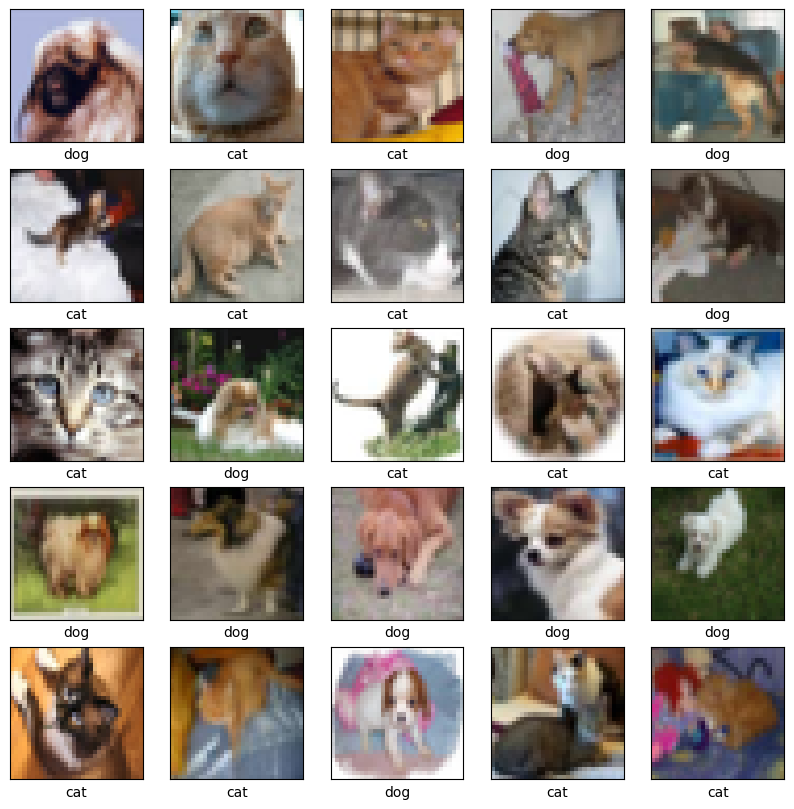

In [5]:
# Plot some pictures
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_cats_dogs[i])
    plt.xlabel(class_names[train_labels_cats_dogs[i][0]])
plt.show()

In [6]:
# Models generally run better on normalized values. The best way to normalize the data depends on each individual dataset. 
# For the CIFAR10 dataset, we want each value to be between 0.0 and 1.0. 
# As all values originally fall under the 0.0-255.0 range, divide by 255.0.

train_images_cats_dogs = train_images_cats_dogs / 255
test_images_cats_dogs = test_images_cats_dogs / 255


In [ ]:
#Convolutional neural networks
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))


model.summary()

In [ ]:
model.compile(  optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), ## Since we use softmax
                metrics=['accuracy']) ## We can use accuracy as metric

history = model.fit(train_images_cats_dogs, train_labels_cats_dogs, 
                    epochs=20, 
                    validation_data=(test_images_cats_dogs, test_labels_cats_dogs))


**TIP:** Go to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU

Rerun the previous cell and see the difference in training time.

32/32 - 0s - loss: 1.3834 - accuracy: 0.7090 - 86ms/epoch - 3ms/step
Test loss: 1.3834106922149658
Test accuracy: 0.7089999914169312


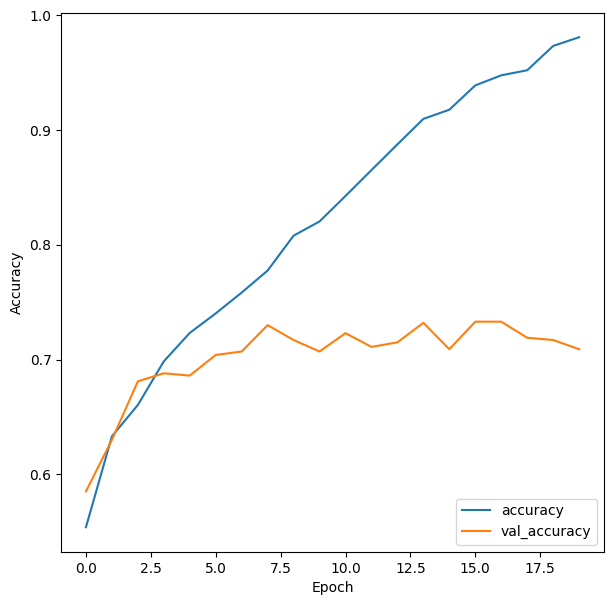

In [9]:
# Evaluate the model

plt.figure(figsize=(7,7))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_cats_dogs,  test_labels_cats_dogs, verbose=2)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')


In [10]:
# Useful functions to plot the results

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i][0]
  plt.grid(False)
  plt.xticks(range(len(class_names)))
  plt.yticks([])
  thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

32/32 [==============================] - 0s 2ms/step


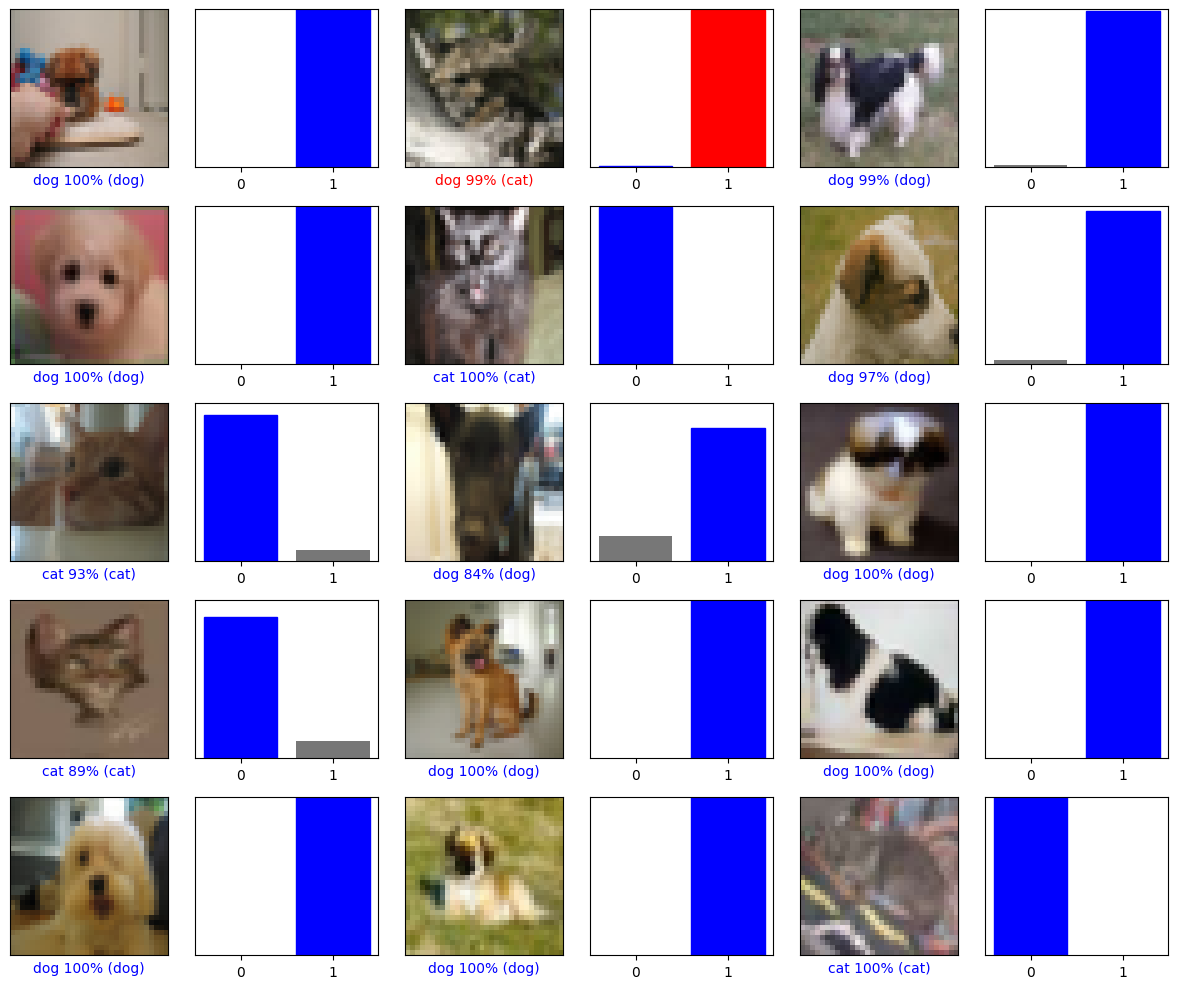

In [11]:
predictions = model.predict(test_images_cats_dogs)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels_cats_dogs, test_images_cats_dogs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels_cats_dogs)
  #plt.title("True: %s \nPredict: %s" % (test_labels_cats_dogs[i], test_labels_cats_dogs[predictions[i]]))
plt.tight_layout()
plt.show()

**To Do:**

Now we will try a more complex classification task. We will try to classify all 10 classes from the Cifar10 dataset. 
Your task is to create a CNN model, train it and evaluate the accuracy.
Try to tune the hyperparameters of the CNN model and (number of layers, number of filters, parameters of the optimiser etc)

TIP: Search in the [documentation](https://keras.io/) for changing the architecture of the neural network.

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
## Load the data as the previous example

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print()

img_width, img_height, img_num_channels = x_train.shape[1], x_train.shape[2], x_train.shape[3]

input_shape = (img_width, img_height, img_num_channels)   ## Input shape

print(f'Image width: {img_width}, Image height: {img_height}, Number of channels: {img_num_channels}')
print(f'Thus -> Input shape:{input_shape}')

# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10 ## We'll try to classify all 10 classes of the dataset

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert class vectors to binary class matrices. This is called one-hot encoding.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print()
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

In [ ]:
# Create the model
model = tf.keras.Sequential()


# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  

#  What is dropout? Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data.
#  It is a form of regularization, where a proportion of nodes in the layer are randomly ignored (setting their weights to zero) for each training sample.
#  This has the effect of making the layer look for distributed features in its input, which improves generalization.

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu',))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu',))
## MaxPooling every other layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(units = 512, activation='relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(units = num_classes, activation='softmax'))


model.summary()

In [ ]:
# Let's train the model 
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    shuffle=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


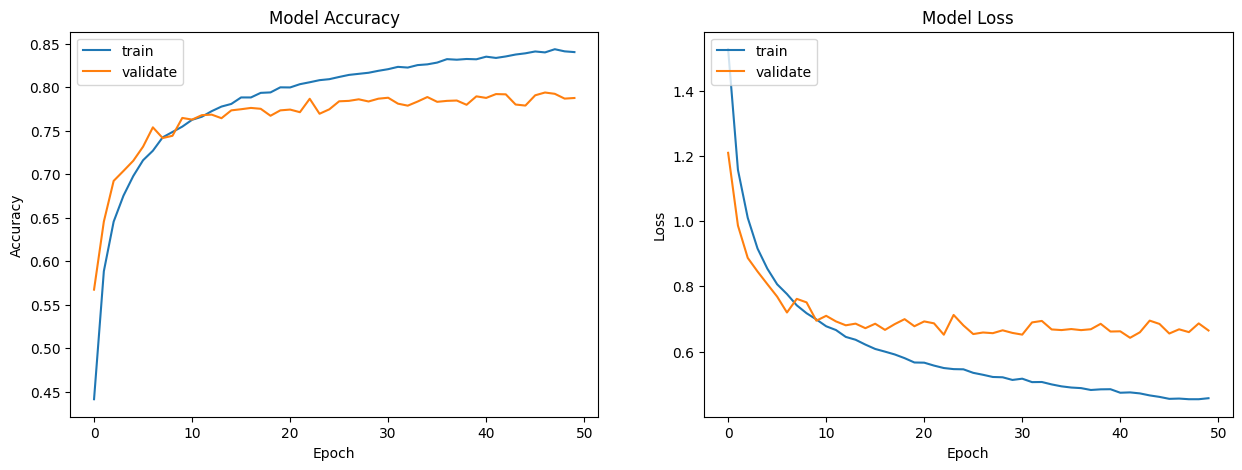

In [16]:
# Evaluate the model
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [17]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.6648 - accuracy: 0.7875
Test loss: 0.6647813320159912
Test accuracy: 0.7875000238418579
313/313 [==============================] - 1s 2ms/step


In [23]:
# make prediction.
pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1)

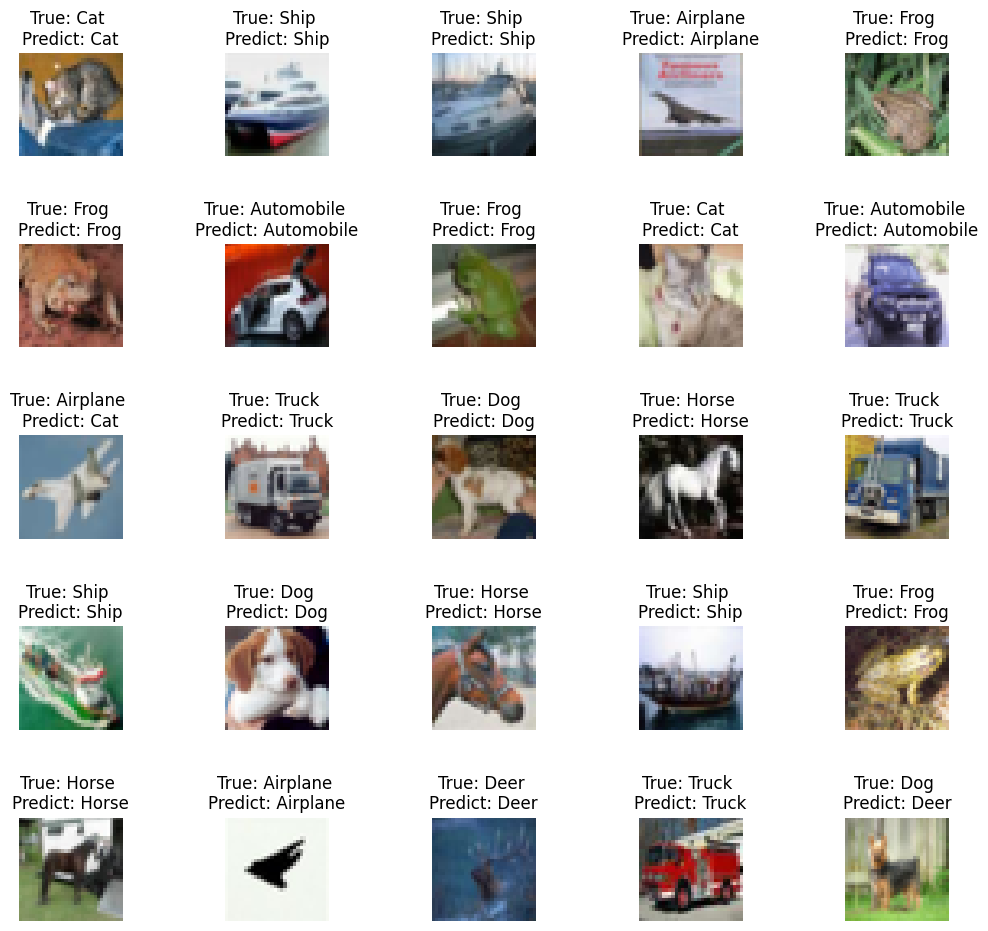

In [24]:
## Check the predicted labels against the true labels

num_rows = 5
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, num_rows*num_cols):
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"True: {labels[y_true[i]]} \nPredict: {labels[y_pred_classes[i]]}")
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**Resources**



*   TensorFlow [guide](https://www.tensorflow.org/guide)
*   Stanford's [Course](https://cs231n.github.io/convolutional-networks/) for CNNs
* Professor Jeff Heaton's github [page](https://github.com/huisai/jeffheaton-t81_558_deep_learning) for Deep Learning
* Deep Learning Tuning [Playbook](https://github.com/google-research/tuning_playbook) from Google

